In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [208]:
df=pd.read_csv("heart-2.csv")
df.head()
df.shape

(1025, 14)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [210]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [211]:
df.duplicated().sum()


723

,proportion
sex,
1,69.560976
0,30.439024


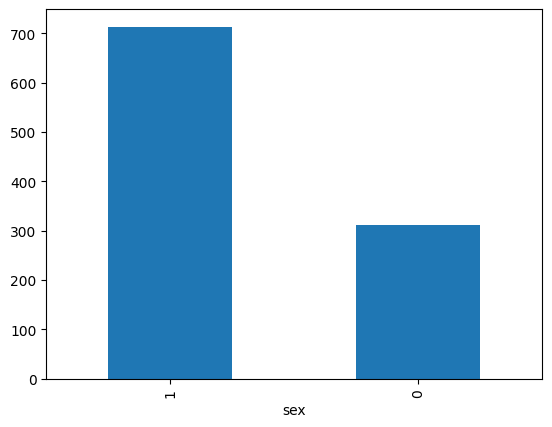

In [212]:
df['sex'].value_counts().plot(kind='bar')
df['sex'].value_counts(normalize=True) * 100


,proportion
cp,
0,48.487805
2,27.707317
1,16.292683
3,7.512195


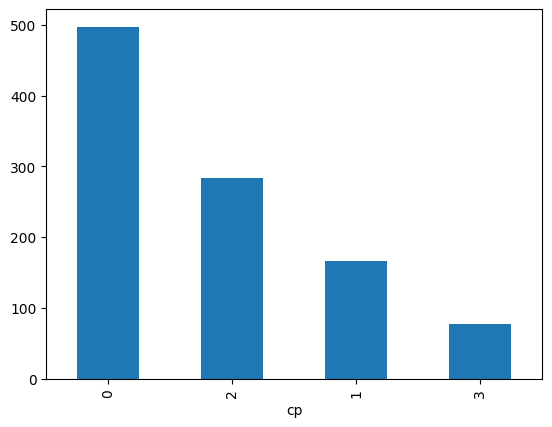

In [213]:
df['cp'].value_counts().plot(kind='bar')
df['cp'].value_counts(normalize=True) * 100


,proportion
fbs,
0,85.073171
1,14.926829


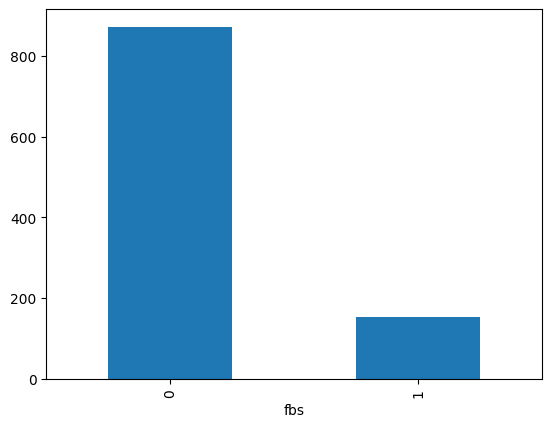

In [214]:
df['fbs'].value_counts().plot(kind='bar')
df['fbs'].value_counts(normalize=True) * 100


,proportion
restecg,
1,50.048780
0,48.487805
2,1.463415


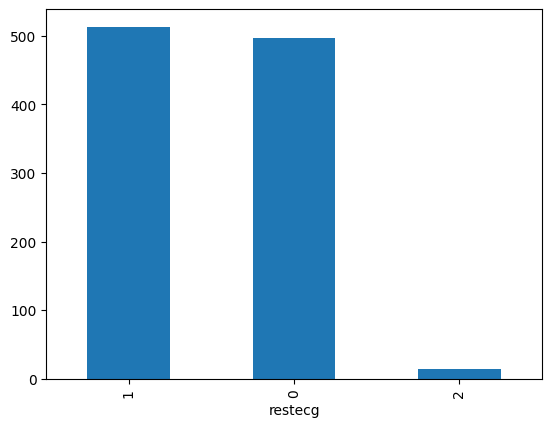

In [215]:
df['restecg'].value_counts().plot(kind='bar')
df['restecg'].value_counts(normalize=True) * 100


,proportion
exang,
0,66.341463
1,33.658537


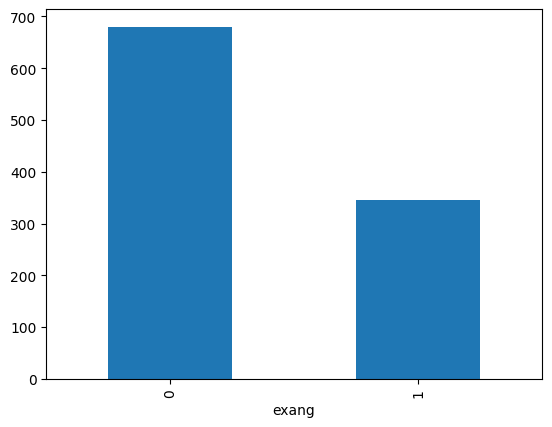

In [216]:
df['exang'].value_counts().plot(kind='bar')
df['exang'].value_counts(normalize=True) * 100


,proportion
slope,
1,47.024390
2,45.756098
0,7.219512


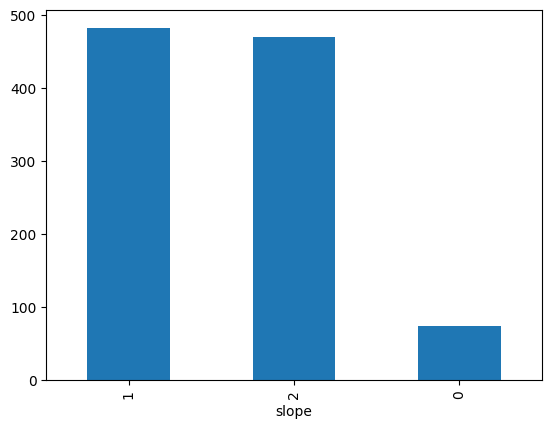

In [217]:
df['slope'].value_counts().plot(kind='bar')
df['slope'].value_counts(normalize=True) * 100


,proportion
ca,
0,56.390244
1,22.048780
2,13.073171
3,6.731707
4,1.756098


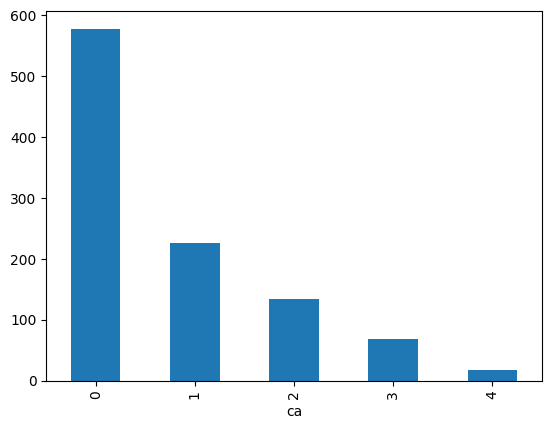

In [218]:
df['ca'].value_counts().plot(kind='bar')
df['ca'].value_counts(normalize=True) * 100


,proportion
thal,
2,53.073171
3,40.000000
1,6.243902
0,0.682927


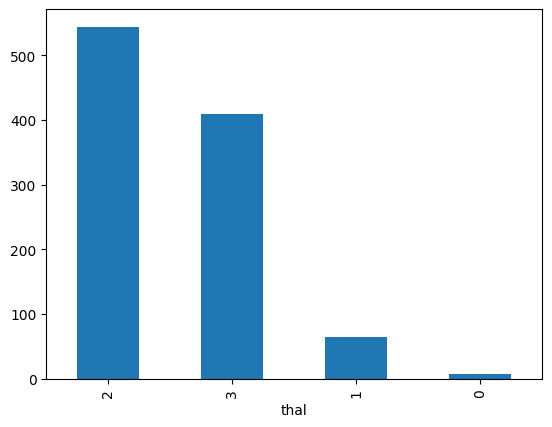

In [219]:
df['thal'].value_counts().plot(kind='bar')
df['thal'].value_counts(normalize=True) * 100


<Axes: >

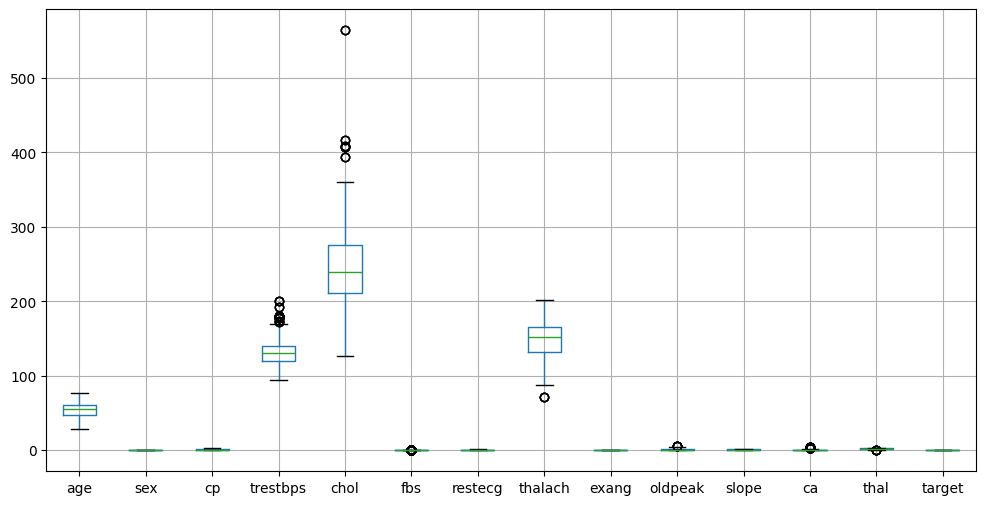

In [220]:
df.boxplot(figsize=(12,6))

In [221]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_outliers)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1      53    1   0       140   203    1        0      155      1      3.1   
4      62    0   0       138   294    1        1      106      0      1.9   
6      58    1   0       114   318    0        2      140      0      4.4   
11     43    0   0       132   341    1        0      136      1      3.0   
13     51    1   0       140   298    0        1      122      1      4.2   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1003   52    1   0       108   233    1        1      147      0      0.1   
1006   58    1   2       140   211    1        0      165      0      0.0   
1013   58    1   0       114   318    0        2      140      0      4.4   
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   

      slope  ca  thal  target  
1         0   0     3       0  
4         1

In [222]:
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [223]:
from scipy.stats.mstats import winsorize

df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])
df['thalach'] = winsorize(df['thalach'], limits=[0.05, 0.05])
df['oldpeak'] = winsorize(df['oldpeak'], limits=[0.05, 0.05])
df['trestbps'] = winsorize(df['trestbps'], limits=[0.05, 0.05])
df.shape

(1025, 14)

<Axes: >

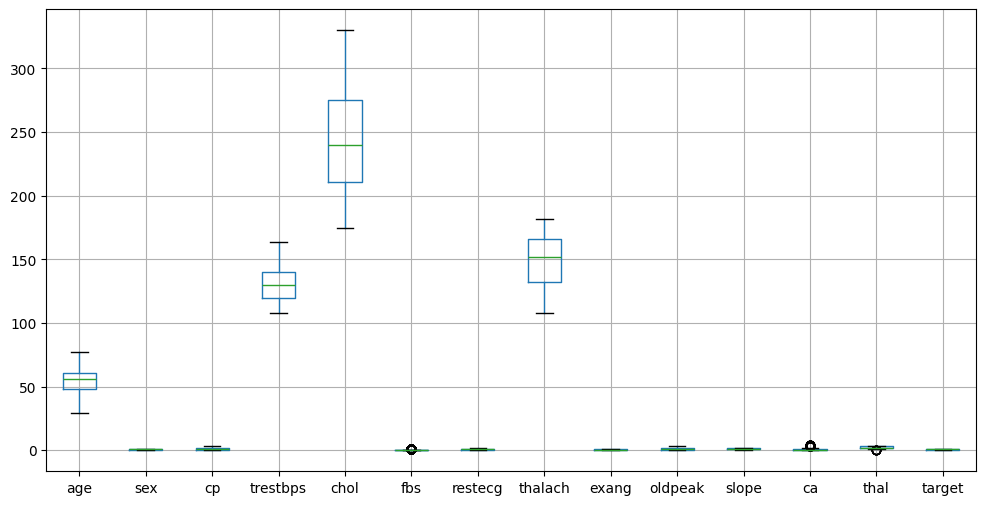

In [224]:
df.boxplot(figsize=(12,6))

In [225]:
x = df.drop('target', axis=1)
y = df['target']

In [226]:
#splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [227]:
print(df.shape)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1025, 14)
(1025, 13)
(1025,)
(820, 13)
(205, 13)
(820,)
(205,)


In [228]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Training using sklearn, prediction, Performance metrics and heatmap**

In [229]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [230]:
#check accuracy f1score and confusion matrix and classification
prediction=model.predict(x_test)
print("Accuracy score= ", "{:.2f}".format((accuracy_score(y_test, prediction)*100)))
print("Confusion matrix=\n",confusion_matrix(y_test, prediction))
print("Classification report=\n",classification_report(y_test, prediction))

Accuracy score=  86.34
Confusion matrix=
 [[ 77  21]
 [  7 100]]
Classification report=
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



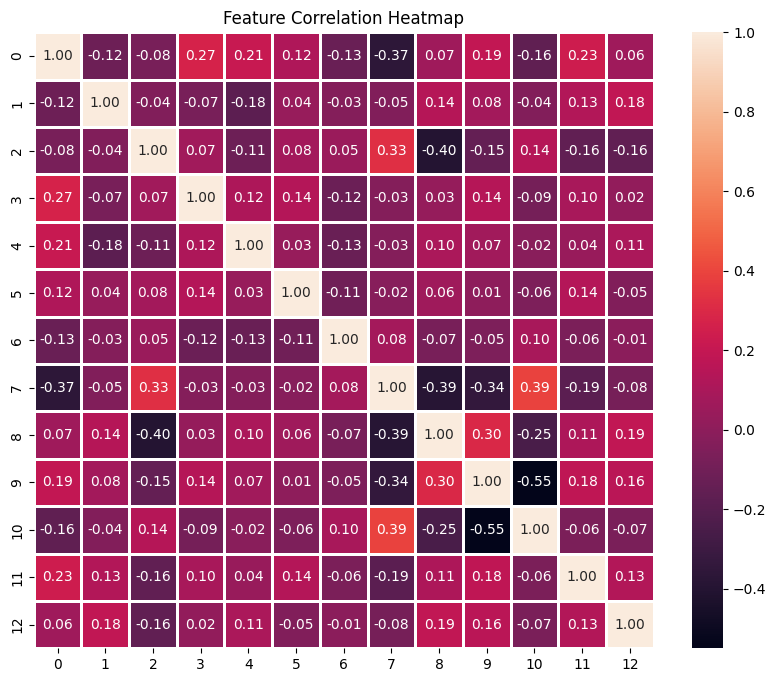

In [231]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(x_train).corr(), annot=True, fmt='.2f', linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Training using cost function, prediction, Performance metrics and heatmap**



In [232]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(x, y, w, b):
    m = len(y)
    z = np.dot(x, w) + b
    h = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(x, y, w, b, alpha, epochs):
    m = len(y)
    cost_history = []
    for _ in range(epochs):
        z = np.dot(x, w) + b
        h = sigmoid(z)
        dw = (1 / m) * np.dot(x.T, (h - y))
        db = (1 / m) * np.sum(h - y)
        w -= alpha * dw
        b -= alpha * db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

# Initialize parameters
w = np.zeros(x_train.shape[1])
b = 0
alpha = 0.1  # Increased learning rate for better convergence
epochs = 5000  # Increased iterations for better optimization

# Train model using gradient descent
w, b, cost_history = gradient_descent(x_train, y_train, w, b, alpha, epochs)

In [233]:
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b) >= 0.5
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b) >= 0.5

y_pred = predict(x_test, w, b)
print("Accuracy score=", "{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
print("Confusion matrix=\n", confusion_matrix(y_test, y_pred))
print("Classification report=\n", classification_report(y_test, y_pred))

Accuracy score= 86.34
Confusion matrix=
 [[ 77  21]
 [  7 100]]
Classification report=
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



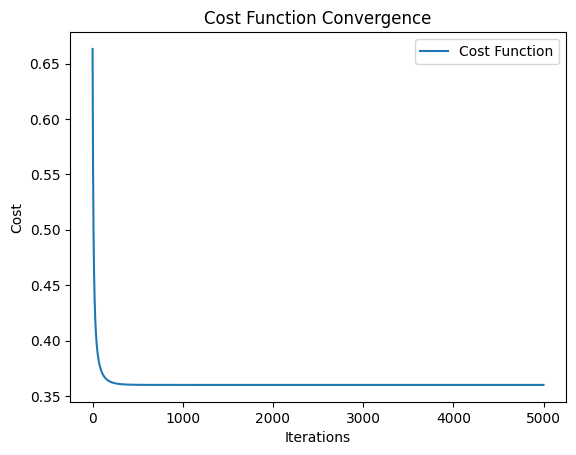

In [234]:
plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

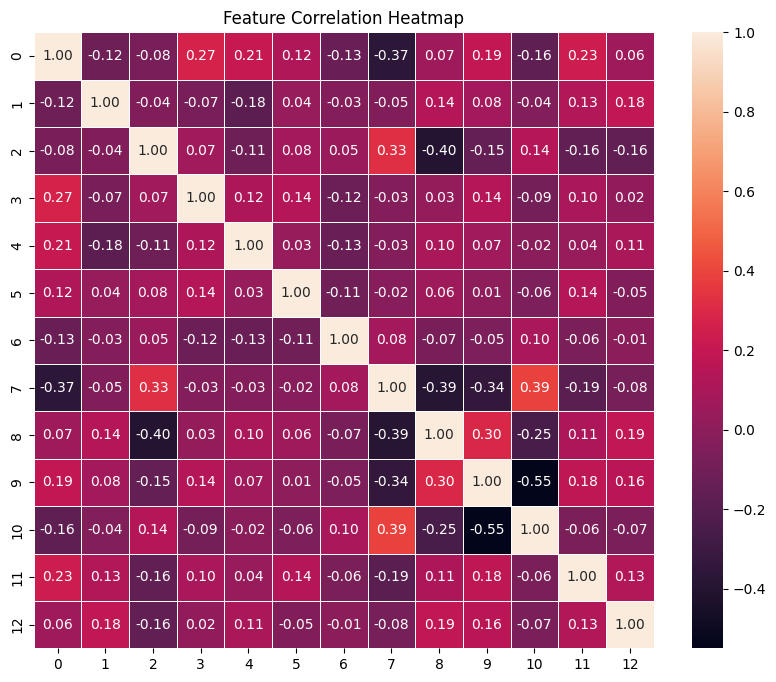

In [240]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(x_train).corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()